In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for LSTM 1
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [4]:
df_orig = pd.read_csv('./dataset/Sample_Data_03/dataset_03_with_header.csv')
# dfc = pd.read_csv('C:/Users/malco/Desktop/datasets/Kaggle/UCI_Credit_Card_test.csv')

# train_size = int(len(df_orig)*0.9)
# df_train = df_orig[:train_size]
# df_test = df_orig[train_size:]

# df_train.to_csv('./dataset/Sample_Data_03/dataset_03_with_header_train.csv')
# df_test.to_csv('./dataset/Sample_Data_03/dataset_03_with_header_test.csv')

df = df_orig.copy()

# Split into Train and Test .csv

In [5]:
!nvidia-smi

Tue Apr 27 15:13:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.00    Driver Version: 418.87.00    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  On   | 00000000:17:00.0 Off |                  N/A |
|  0%   55C    P2    63W / 250W |  11005MiB / 11178MiB |     19%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:65:00.0 Off |                  N/A |
|  0%   26C    P8    18W / 250W |    892MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [6]:
from pandas import set_option
pd.set_option('max_rows',1000)
pd.set_option('max_columns',1000)

df.describe()


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,1.000000e+05,78568.000000,78568.000000,78576.000000,93890.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63128.000000,1.000000e+05,1.000000e+05,8.032600e+04,80326.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,63128.000000,63128.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.0,100000.0,100000.0,100000.00000,19319.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,58215.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,20949.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,33519.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000

In [7]:
y = df.loc[:, 'y']
y
y.describe()

count    100000.000000
mean        619.198230
std         118.461932
min         300.000000
25%         524.000000
50%         599.000000
75%         720.000000
max         839.000000
Name: y, dtype: float64

In [8]:
df1 = df.iloc[:, :100]
df1 = pd.concat([y, df1],axis=1)
df1

df2 = df.iloc[:, 100:200]
df2 = pd.concat([y, df2],axis=1)
df2

df3 = df.iloc[:, 200:]
df3 = pd.concat([y, df3],axis=1)
df3

# df1.info()

,y,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,706
1,558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,4582,4.0,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5000,5206,5206,0.9339,0,NaN,5206,0.9339,1,1,1,0,NaN,0,NaN,558
2,577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,577
3,526,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0,4796,4340.0,4000.0,-156,14.0,14.0,14.0000,2,1,1.5200,456,1,1,1,1,0,1,1,1,0,2.0,1,63.0,63.0,63.0,57762,0.8231,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,0,0.8204,62558,4796,1.1153,1,2,2,58218,58218,0,1,1,1,1,0,2.0,63.0,63.0,63.0000,57762,57762,0.8231,57762,0.8231,0,NaN,1,1,1,0,NaN,0,NaN,526
4,496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0,190,186.0,1000.0,710,34.0,25.0,29.5000,3,1,0.6200,186,1,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.1000,190,186,0.1430,1,1,1,190,190,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,578,8,0,5,17,31,34,0,0,1,3,4,0,5,14,25,26,0,5,13,22,22,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.0,500.0,0,NaN,NaN,NaN,1,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,10683,3.0,3.0,3.0,0.9166,1,1,1,0.3308,37362,0,0.0000,0,0,0,30960,0,30960,1,1,1,5,0,5.0,200.0,3.0,157.4000,30960,30960,1.2621,0,NaN,30960,1.2621,1,1,1,1,5.0,20277,1.5749,578
99996,835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1,1,1,1,1,1,0,1,1,5177,5126.0,47500.0,47449,292.0,102.0,197.0000,0,0,NaN,0,1,1,1,1,1,1,1,1,0,1.0,0,163.0,163.0,163.0,31202,0.1431,1,1,1,1,0,80.0,80.0,80.0,NaN,0,0,1,0.0872,36379,0,NaN,0,0,0,36379,0,36379,1,1,1,1,0,1.0,80.0,80.0,80.0000,0,31202,NaN,0,NaN,0,NaN,0,0,1,0,NaN,0,NaN,835
99997,425,11,20,20,20,20,20,7,7,7,7,7,9,9,9,9,9,2,2,2,2,2,1.0,1.0,2,1,1,0,0,0,0,1,1,17958,5663.0,5000.0,-857,35.0,4.0,24.3333,7,2,1.1419,7137,1,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,3156,33.0,30.0,31.5,0.3940,1,1,1,0.4824,31058,27971,0.7732,7,7,7,20507,20237,270,1,1,1,5,5,5.0,33.0,15.0,27.3999,13100,13100,0.5592,13100,0.5592,0,NaN,1,1,1,0,NaN,0,NaN,425
99998,398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,0,0,2,2,699,378.0,300.0,-99,4.0,3.0,3.5000,1,1,1.2600,378,1,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,1.1650,699,378,1.2600,1,1,1,699,378,321,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,398


In [9]:
df1.corr()

,y,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100
y,1.000000,0.164841,0.485744,0.121207,0.419683,0.575970,0.092144,0.008623,-0.021920,-0.001522,0.043654,0.113111,0.117558,0.178163,0.474342,0.308842,0.194172,0.302084,0.410462,0.413284,0.415688,0.242804,0.568884,0.480639,-0.059221,0.487376,0.212508,0.424206,0.414760,0.217832,0.425470,-0.280099,-0.077719,-0.112868,-0.191694,-0.254842,-0.312055,-0.091270,-0.125037,-0.216553,-0.291714,-0.690840,0.293363,0.368446,0.212458,0.145432,0.507595,0.306987,0.195027,0.137282,0.096114,0.059743,0.029612,0.012722,-0.022510,-0.091911,-0.336567,-0.636510,-0.586811,-0.415029,-0.001973,-0.177372,-0.293974,-0.358450,-0.411101,-0.413885,-0.212327,NaN,-0.059887,-0.106879,-0.138074,-0.183339,-0.204699,-0.284965,-0.175537,-0.260677,-0.192416,-0.047028,-0.090930,-0.113628,-0.161110,-0.178198,-0.088651,-0.039574,-0.033738,-0.041799,-0.068299,-0.078563,-0.081274,-0.229252,-0.071259,-0.105102,-0.050871,-0.026350,NaN,NaN,NaN,-0.191670,0.205857,-0.307428,-0.203669
x001,0.164841,1.000000,0.097072,0.025511,0.087469,0.113784,-0.000547,0.010608,-0.044504,-0.030123,-0.003545,0.016469,0.026680,0.038326,0.095711,0.047548,0.030942,0.045983,0.080246,0.082774,0.054282,0.029643,0.097580,0.088210,-0.004985,0.106287,0.060710,0.075518,0.093136,0.055005,0.056276,-0.087867,0.031904,0.044904,-0.009398,-0.081759,-0.100808,0.030165,0.049283,-0.011101,-0.096029,-0.094834,0.068601,0.073201,0.054406,0.034703,0.070108,0.042196,0.032434,0.021463,0.016741,0.007528,0.003773,0.006460,-0.003577,-0.009951,-0.068212,-0.087283,-0.082405,-0.078705,-0.001426,-0.029644,-0.053330,-0.068207,-0.077192,-0.078686,-0.035078,NaN,-0.006926,-0.012900,-0.023347,-0.029957,-0.033926,-0.053823,-0.026289,-0.046238,-0.028962,-0.003561,-0.013555,-0.019475,-0.022006,-0.026910,-0.013206,-0.003895,-0.008080,-0.013437,-0.016121,-0.016656,-0.014090,-0.043615,-0.010002,-0.014983,-0.008011,-0.008791,NaN,NaN,NaN,-0.029942,0.020780,-0.046359,-0.020871
x002,0.485744,0.097072,1.000000,0.297062,0.831371,0.750919,0.120643,-0.129729,-0.157916,-0.081200,-0.021819,0.043906,0.081502,0.143872,0.525007,0.263891,0.213365,0.226280,0.311074,0.328338,0.327244,0.225376,0.379772,0.341642,-0.047485,0.377780,0.082446,0.223222,0.317674,0.128936,0.320575,-0.233853,-0.089168,-0.130631,-0.186278,-0.223656,-0.262189,-0.102764,-0.146585,-0.212877,-0.257432,-0.287362,0.296907,0.309498,0.213113,0.092512,0.393890,0.208095,0.125955,0.087470,0.075828,0.055900,0.043069,0.040788,0.026208,0.014343,-0.131454,-0.210804,-0.317767,-0.200420,0.004498,-0.088482,-0.149214,-0.176933,-0.196854,-0.199829,-0.102195,NaN,-0.032209,-0.056349,-0.070539,-0.089385,-0.099169,-0.135806,-0.083611,-0.110326,-0.100841,-0.019497,-0.042871,-0.057463,-0.080341,-0.088984,-0.106869,-0.031730,-0.027204,-0.043152,-0.071901,-0.088149,-0.097289,-0.105121,-0.042275,-0.042871,-0.021236,-0.016519,NaN,NaN,NaN,-0.077578,0.044321,-0.088190,-0.068000
x003,0.121207,0.025511,0.297062,1.000000,0.705223,0.227947,0.240625,-0.259942,-0.291211,-0.206302,-0.166482,-0.147756,-0.097560,-0.065378,0.021962,-0.185542,-0.259247,-0.106323,-0.162806,-0.306516,-0.126931,-0.212223,-0.072472,-0.208822,-0.148690,0.008237,-0.161155,-0.060263,-0.032325,-0.157491,-0.118051,-0.182966,-0.073843,-0.116832,-0.153428,-0.172722,-0.227441,-0.091193,-0.144028,-0.190729,-0.217026,-0.182778,-0.027359,-0.016733,0.016802,0.149069,-0.035156,-0.070002,-0.088691,-0.086421,-0.089009,-0.091814,-0.096599,-0.098604,-0.108973,-0.123694,-0.091091,-0.243775,-0.070673,0.003201,-0.002337,-0.007786,-0.010467,-0.007265,-0.000565,0.003191,0

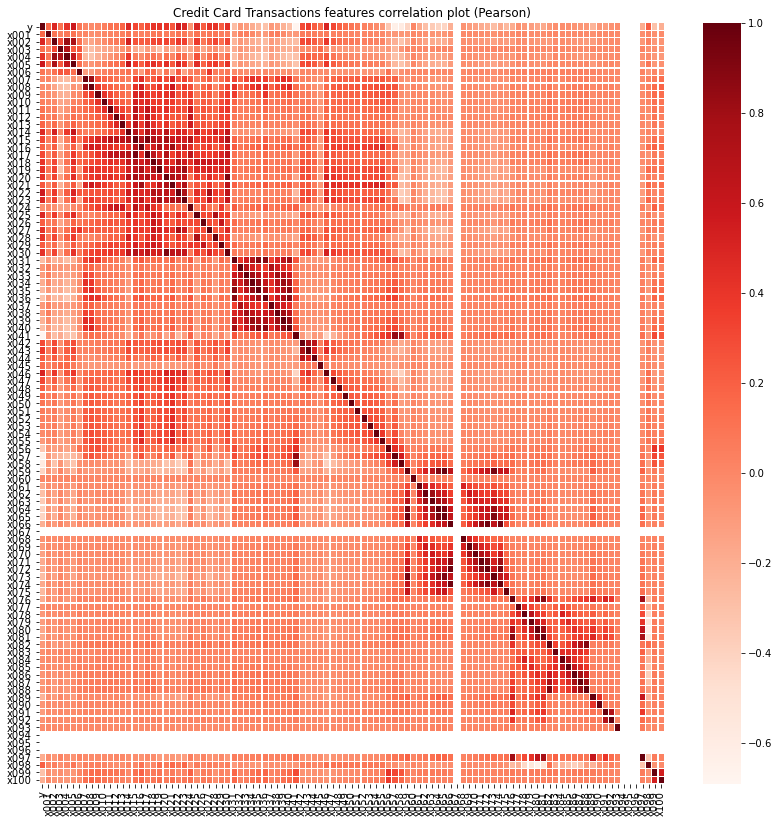

In [10]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
x001,x001,0.000
x002,x002,21.432
x003,x003,21.432
x004,x004,21.424
x005,x005,6.110
x006,x006,0.000
x007,x007,0.000
x008,x008,0.000
x009,x009,0.000
x010,x010,0.000


In [12]:
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
x001,x001,0.000
x178,x178,0.000
x179,x179,0.000
x180,x180,0.000
x181,x181,0.000
x182,x182,0.000
x183,x183,0.000
x184,x184,0.000
x185,x185,0.000
x186,x186,0.000


We can see in x242 column, there are 93% of missing values. 
However, Let's be naive and keep all the data. and do our prediction. Then, we shall impute our missing values. 
and do another round of prediction



In [13]:
#see which columns have missing values, sort according to percent missing
missing_value_df_only = missing_value_df[missing_value_df['percent_missing'] != 0]
missing_value_df_only

,column_name,percent_missing
x005,x005,6.110
x272,x272,7.189
x234,x234,19.110
x045,x045,19.674
x044,x044,19.674
x235,x235,20.083
x004,x004,21.424
x003,x003,21.432
x002,x002,21.432
x287,x287,24.821


<AxesSubplot:xlabel='column_name', ylabel='percent_missing'>

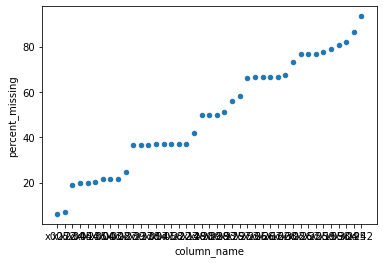

In [14]:
missing_value_df_only.plot(x ='column_name', y='percent_missing', kind = 'scatter')

# Drop >= 67%

In [15]:
#Drop missing values where percent_missing >= 33%
missing_value_df_to_drop_77 = missing_value_df[missing_value_df['percent_missing'] >= 67]
print("missing_value_df_to_drop_77:",missing_value_df_to_drop_77)
col_to_drop_77 = missing_value_df_to_drop_77['column_name'].to_list()
print("col_to_drop_77:",col_to_drop_77)

df_dropped_77perc = df.copy()
df_dropped_77perc.drop(col_to_drop_77, axis=1, inplace = True)
df_dropped_77perc



missing_value_df_to_drop_77:      column_name  percent_missing
x268        x268           67.253
x302        x302           73.069
x256        x256           76.913
x257        x257           76.913
x255        x255           76.913
x259        x259           77.432
x155        x155           79.051
x098        x098           80.681
x304        x304           81.875
x295        x295           86.533
x242        x242           93.339
col_to_drop_77: ['x268', 'x302', 'x256', 'x257', 'x255', 'x259', 'x155', 'x098', 'x304', 'x295', 'x242']


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x258,x260,x261,x262,x263,x264,x265,x266,x267,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x296,x297,x298,x299,x300,x301,x303,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,0,0,1,1,1,0,0,0,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,1,4582,4.0,4.0,4.0,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5000,5206,5206,0.9339,0,5206,0.9339,1,1,1,0,0,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,0,0,1,1,1,0,0,0,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.5200,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,5,5,2,4,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,0,1,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1,9,3,6,7,7,7,5,8,9,9,9,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,

### Drop >= 33%

In [16]:
#Drop missing values where percent_missing >= 33%
missing_value_df_to_drop = missing_value_df[missing_value_df['percent_missing'] >= 33]
print("missing_value_df_to_drop:",missing_value_df_to_drop)
col_to_drop = missing_value_df_to_drop['column_name'].to_list()
print("col_to_drop:",col_to_drop)

df_dropped_33perc = df.copy()
df_dropped_33perc.drop(col_to_drop, axis=1, inplace = True)
df_dropped_33perc


missing_value_df_to_drop:      column_name  percent_missing
x239        x239           36.744
x237        x237           36.744
x238        x238           36.744
x057        x057           36.872
x041        x041           36.872
x058        x058           36.872
x222        x222           36.987
x223        x223           37.069
x148        x148           41.785
x290        x290           49.756
x289        x289           49.756
x288        x288           49.756
x293        x293           51.133
x275        x275           56.131
x297        x297           58.112
x253        x253           66.333
x265        x265           66.461
x266        x266           66.461
x267        x267           66.461
x162        x162           66.481
x268        x268           67.253
x302        x302           73.069
x256        x256           76.913
x257        x257           76.913
x255        x255           76.913
x259        x259           77.432
x155        x155           79.051
x098        x098      

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x149,x150,x151,x152,x153,x154,x156,x157,x158,x159,x160,x161,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x240,x241,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x254,x258,x260,x261,x262,x263,x264,x269,x270,x271,x272,x273,x274,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,1,1,1,0,0,NaN,0,0,0,0,0,0,0,0,0,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4582,1,1,1,0.9339,5206,0,0,0,0,5206,0,5206,1,1,1,2,0,1.0,5206,5206,0,5206,1,1,1,0,0,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,5,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2281,1613,1613,0,0,0,0,0,0,1,1,1,0,0,NaN,0,0,0,0,0,0,0,0,0,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,5,5,2,4,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1,9,3,6,7,7,7,5,8,9,9,9,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4796,4340.0,4000.0,-156,2,1,456,1,1,1,1,0,1,1,1,0,1,57762,1,1,1,0,0,0,0,0,0.8204,62558,4796,1,2,2,58218,58218,0,1,1,1,1,0,2.0,57762,57762,57762,0,1,1,1,0,0,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,0,0,0,0,3,2,1,2,1,3,2,2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,900,710,1000.0,300.0,1,0,0,0,0,0,1,0,0,0,0,7,0,1,1,3,7,7,1,0,0,0,0,1,1,3,1,2810,0,0,0,0,0

# Model 1: Perform Simple LSTM as a TIME SERIES
Objective: Perform as a TS and later perform as a non-TS to see if which fares better. #Check

### Normalize Data

In [17]:
df1

,y,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100
0,706,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
1,558,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
2,577,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0,0
3,526,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.5200,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,101.0,1,1
4,496,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,0,0,0,0,3,2,1,2,1,3,2,2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0.2111,900,710,1000.0,300.0,1,0,0,0,0,0,1,0,0,0,0,0.6200,0.0066,7,0,1,1,3,7,7,1,0,0,0,0,1,1,3,1,2810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,578,1573467,200.0,3.0,157.0,200.0,1,3,3,0,0,0,1,0,12,16,5,11,4,2,2,0,1,0,14,0,1,1,0,4,2,7,0,1,3,4,6,0,1,2,3,NaN,0,0,500.0,250.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
99996,835,1653422,292.0,80.0,159.0,292.0,1,1,1,1,2,0,4,3,6,17,4,13,5,3,13,1,3,1,2,1,1,1,1,2,8,2,0,0,1,2,2,0,0,1,2,0.0010,47500,47449,47500.0,100.0,1,0,0,0,0,0,0,0,0,0,0,0.0010,0.0010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
99997,425,1284669,35.0,4.0,26.0,57.0,0,1,1,5,10,4,0,0,0,20,8,12,6,4,11,3,3,1,9,0,1,1,0,2,9,17,0,1,7,8,9,0,1,3,4,1.1308,6550,-857,5000.0,300.0,1,0,0,0,0,0,0,0,1,2,5,1.1792,0.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,7,0
99998,398,1434877,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,2,2,2,2,0,0,0,1,0,0,1,7,0,2,6,6,6,0,2,5,5,1.1650,600,-99,300.0,300.0,0,0,0,0,0,0,0,0,0,0,2,1.2600,1.0700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,17.0,1,1


In [18]:

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values

	return agg

In [19]:
# call series_to_supervised function
# df1_ = df1.iloc[:,:50]

pd.set_option('max_columns',1000)
values = df1.values
values = values.astype('float32')
values

scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(values)
scaled

# frame as supervised learning
# convert series to supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed

# drop columns we don't want to predict
reframed.drop(reframed.columns[[i for i in range(102,202)]], axis=1, inplace=True) 
# print(reframed.head())
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var1(t)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753247
1,0.753247,0.918371,NaN,NaN,NaN,0.009674,1.0,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005291,0.000000,0.006173,0.0625,0.000000,0.006289,0.000000,0.166667,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.007463,0.009950,0.000000,0.000000,0.000000,0.005682,0.021277,0.00,0.000000,0.00,0.029412,NaN,0.000000,0.010137,0.000027,0.001760,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.478664
2,0.478664,0.490582,0.005571,0.004261,0.004261,0.004837,0.0,0.045455,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010582,0.022989,0.000000,0.1250,0.181818,0.000000,0.000000,0.000000,0.0,0.015504,0.0,1.0,0.0,0.000000,0.021739,0.000000,0.069652,0.205882,0.137931,0.095238,0.062500,0.170213,0.25,0.153846,0.20,0.147059,NaN,0.000000,0.010137,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.044693,0.0,0.045455,0.021739,0.032258,0.032258,0.046512,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.039106,0.000000,0.048754,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.513915
3,0.513915,0.649664,NaN,NaN,NaN,0.116082,1.0,0.000000,0.000000,0.000000,0.030303,0.068182,0.090909,0.023810,0.000000,0.047619,0.000000,0.055556,0.1250,0.000000,0.056604,0.000000,0.333333,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.019900,0.000000,0.000000,0.000000,0.000000,0.021277,0.00,0.000000,0.00,0.000000,NaN,0.000000,0.010137,0.000164,0.001173,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.060606,NaN,NaN,0.016760,0.0,0.000000,0.000000,0.000000,0.000000,0.017442,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007162,0.016667,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.890756,0.000000,0.000000,0.419295
4,0.419295,0.684234,0.087744,0.019886,0.053977,0.311971,0.0,0.000000,0.000000,0.012346,0.060606,0.022727,0.022727,0.023810,0.014706,0.037037,0.022989,0.030864,0.3125,0.181818,0.025157,0.011905,0.500000,0.2,0.023256,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.004975,0.000000,0.000000,0.009524,0.005682,0.021277,0.00,0.000000,0.05,0.029412,0.116954,0.000038,0.010105,0.000364,0.000587,0.00,0.0

In [20]:
reframed = reframed[1:]
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var1(t)
1,0.753247,0.918371,NaN,NaN,NaN,0.009674,1.0,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005291,0.000000,0.006173,0.0625,0.000000,0.006289,0.000000,0.166667,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.007463,0.009950,0.000000,0.000000,0.000000,0.005682,0.021277,0.00,0.000000,0.00,0.029412,NaN,0.000000,0.010137,0.000027,0.001760,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.478664
2,0.478664,0.490582,0.005571,0.004261,0.004261,0.004837,0.0,0.045455,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010582,0.022989,0.000000,0.1250,0.181818,0.000000,0.000000,0.000000,0.0,0.015504,0.0,1.0,0.0,0.000000,0.021739,0.000000,0.069652,0.205882,0.137931,0.095238,0.062500,0.170213,0.25,0.153846,0.20,0.147059,NaN,0.000000,0.010137,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.044693,0.0,0.045455,0.021739,0.032258,0.032258,0.046512,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.039106,0.000000,0.048754,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.513915
3,0.513915,0.649664,NaN,NaN,NaN,0.116082,1.0,0.000000,0.000000,0.000000,0.030303,0.068182,0.090909,0.023810,0.000000,0.047619,0.000000,0.055556,0.1250,0.000000,0.056604,0.000000,0.333333,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.019900,0.000000,0.000000,0.000000,0.000000,0.021277,0.00,0.000000,0.00,0.000000,NaN,0.000000,0.010137,0.000164,0.001173,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,NaN,NaN,0.016760,0.0,0.000000,0.000000,0.000000,0.000000,0.017442,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007162,0.016667,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.890756,0.000000,0.000000,0.419295
4,0.419295,0.684234,0.087744,0.019886,0.053977,0.311971,0.0,0.000000,0.000000,0.012346,0.060606,0.022727,0.022727,0.023810,0.014706,0.037037,0.022989,0.030864,0.3125,0.181818,0.025157,0.011905,0.500000,0.2,0.023256,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.004975,0.000000,0.000000,0.009524,0.005682,0.021277,0.00,0.000000,0.05,0.029412,0.116954,0.000038,0.010105,0.000364,0.000587,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,0.097063,0.116954,0.027933,0.0,0.000000,0.000000,0.000000,0.040323,0.029070,0.052632,0.0,0.0,0.0,0.0,0.053571,0.052632,0.027933,0.052632,0.001490,0.016667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.848740,0.034483,0.052632,0.363636
5,0.363636,0.733087,0.047354,0.035511,0.041193,0.041112,1.

In [21]:
reframed_fillna = reframed.copy()

### Lets say you just want to simply use fillna

In [22]:
reframed_fillna.fillna(0, inplace = True) 

In [23]:
reframed_fillna

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var1(t)
1,0.753247,0.918371,0.000000,0.000000,0.000000,0.009674,1.0,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005291,0.000000,0.006173,0.0625,0.000000,0.006289,0.000000,0.166667,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.007463,0.009950,0.000000,0.000000,0.000000,0.005682,0.021277,0.00,0.000000,0.00,0.029412,0.000000,0.000000,0.010137,0.000027,0.001760,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.478664
2,0.478664,0.490582,0.005571,0.004261,0.004261,0.004837,0.0,0.045455,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010582,0.022989,0.000000,0.1250,0.181818,0.000000,0.000000,0.000000,0.0,0.015504,0.0,1.0,0.0,0.000000,0.021739,0.000000,0.069652,0.205882,0.137931,0.095238,0.062500,0.170213,0.25,0.153846,0.20,0.147059,0.000000,0.000000,0.010137,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.044693,0.0,0.045455,0.021739,0.032258,0.032258,0.046512,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.039106,0.000000,0.048754,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.513915
3,0.513915,0.649664,0.000000,0.000000,0.000000,0.116082,1.0,0.000000,0.000000,0.000000,0.030303,0.068182,0.090909,0.023810,0.000000,0.047619,0.000000,0.055556,0.1250,0.000000,0.056604,0.000000,0.333333,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.019900,0.000000,0.000000,0.000000,0.000000,0.021277,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.010137,0.000164,0.001173,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,0.000000,0.000000,0.016760,0.0,0.000000,0.000000,0.000000,0.000000,0.017442,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007162,0.016667,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.890756,0.000000,0.000000,0.419295
4,0.419295,0.684234,0.087744,0.019886,0.053977,0.311971,0.0,0.000000,0.000000,0.012346,0.060606,0.022727,0.022727,0.023810,0.014706,0.037037,0.022989,0.030864,0.3125,0.181818,0.025157,0.011905,0.500000,0.2,0.023256,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.004975,0.000000,0.000000,0.009524,0.005682,0.021277,0.00,0.000000,0.05,0.029412,0.116954,0.000038,0.010105,0.000364,0.000587,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,0.097063,0.116954,0.027933,0.0,0.000000,0.000000,0.000000,0.040323,0.029070,0.052632,0.0,0.0,0.0,0.0,0.053571,0.052632,0.027933,0.052632,0.001490,0.016667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000

# AutoKeras 1 (Drop df where missing value >=33 %)

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

import autokeras as ak

In [26]:
df_dropped_33perc_train_size = int(len(df_dropped_33perc) * 0.9)
df_dropped_33perc_train = df_dropped_33perc [:df_dropped_33perc_train_size]
df_dropped_33perc_test = df_dropped_33perc [df_dropped_33perc_train_size:]

x_train = df_dropped_33perc_train
x_test = df_dropped_33perc_test



# x_train as pandas.DataFrame, y_train as pandas.Series
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("y")
print(type(y_train))  # pandas.Series

# You can also use pandas.DataFrame for y_train.
y_train = pd.DataFrame(y_train)
print(type(y_train))  # pandas.DataFrame

# You can also use numpy.ndarray for x_train and y_train.
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
print(type(x_train))  # numpy.ndarray
print(type(y_train))  # numpy.ndarray

# Preparing testing data.
y_test = x_test.pop("y")



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(x_train, y_train, epochs=100)
# Predict with the best model.
predicted_y = reg.predict(x_test)
# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

Trial 10 Complete [00h 14m 24s]
val_loss: 1313.2294921875

Best val_loss So Far: 926.4732055664062
Total elapsed time: 02h 35m 43s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
2813/2813 [==============================] - 18s 6ms/step - loss: 51583.6773 - mean_squared_error: 51583.6773
Epoch 2/100
2813/2813 [==============================] - 16s 6ms/step - loss: 1735.9730 - mean_squared_error: 1735.9730
Epoch 3/100
2813/2813 [==============================] - 16s 6ms/step - loss: 1346.6051 - mean_squared_error: 1346.6051
Epoch 4/100
2813/2813 [==============================] - 16s 6ms/step - loss: 1200.0625 - mean_squared_error: 1200.0625
Epoch 5/100
2813/2813 [==============================] - 16s 6ms/step - loss: 1100.6019 - mean_squared_error: 1100.6019
Epoch 6/100
2813/2813 [==============================] - 16s 6ms/step - loss: 1031.0695 - mean_squared_error: 1031.0695
Epoch 7/100
2813/2813 [==============================] - 16s 6ms/step - loss: 987.4272 - mean_squared_error: 

# TPOT

In [27]:
from tpot import TPOTClassifier, TPOTRegressor 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import time
tic = time.time()
import pandas as pd

df = pd.read_csv('C:/Users/malco/Desktop/datasets/Kaggle/UCI_Credit_Card.csv')
print(df)

print("df.shape",df.shape)

df_x = df.iloc[:, :-1]
df_y = df.iloc[:, -1]
print("df_x:",df_x)
print("df_y:",df_y)

X_train, X_test, y_train, y_test = train_test_split(df_x,
                                                    df_y, train_size=0.75, test_size=0.25, random_state=42)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  B

In [26]:
# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)#orig
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')
toc = time.time()

toe = toc-tic

print('took {}sec'.format(toe))



Version 0.11.5 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

## TPOT EDA 

In [ ]:
XXXX

# MLBox

In [ ]:
XXX #SEE PycharmProjects\1. AutoML\MLBOX

# Model 5: Feature selection
and use all columns.